In [1]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
#from keras.applications import MobileNet
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
#from keras.applications.mobilenet import preprocess_input
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
model_name='ResNet50'
number_of_epochs = 100
frozen = False

base_model=ResNet50(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

if frozen:
    for layer in base_model.layers:
        layer.trainable = False

    
x = base_model.output

#These layers act as output layer for mobilenet but are customed to fit for 6 classes instead of imagenets original 1000.
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(6,activation='softmax')(x) #final layer with softmax activation


#%%

model=Model(inputs=base_model.input,outputs=preds)


Instructions for updating:
Colocations handled automatically by placer.


/home/spxylla/anaconda3/envs/dd2424/lib/python3.7/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [3]:
datagen = dict(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split=0.13,
        fill_mode='nearest')

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, **datagen)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)


train_generator = train_datagen.flow_from_directory('./dataset/train',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True,
                                                 subset='training')

validation_generator = train_datagen.flow_from_directory('./dataset/train',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=train_generator.batch_size,
                                                 class_mode='categorical',
                                                 shuffle=True,
                                                 subset='validation')

test_generator = test_datagen.flow_from_directory('./dataset/test',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=1,
                                                 class_mode='categorical',
                                                 shuffle=False
                                                 )

Found 1825 images belonging to 6 classes.
Found 271 images belonging to 6 classes.
Found 431 images belonging to 6 classes.


In [4]:



#specify the inputs
#specify the outputs
#now a model has been created based on our architecture


#%%

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train = train_generator.n // train_generator.batch_size
step_size_validation = validation_generator.n // train_generator.batch_size


history = model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   validation_data = validation_generator, 
                   validation_steps = step_size_validation,
                   epochs = number_of_epochs)

test_loss, test_acc = model.evaluate_generator(generator=test_generator, steps=test_generator.n)

#Get history of loss and accuracy during training and display it with graphs
train_loss = history.history['loss']
train_acc  = history.history['acc']
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
57/57 [==============================] - 33s 586ms/step - loss: 1.5283 - acc: 0.4594 - val_loss: 1.9168 - val_acc: 0.3281
Epoch 2/100
57/57 [==============================] - 24s 414ms/step - loss: 1.1374 - acc: 0.5934 - val_loss: 2.2292 - val_acc: 0.4268
Epoch 3/100
57/57 [==============================] - 24s 421ms/step - loss: 1.0662 - acc: 0.6315 - val_loss: 1.4022 - val_acc: 0.4603
Epoch 4/100
57/57 [==============================] - 24s 424ms/step - loss: 1.1895 - acc: 0.5802 - val_loss: 2.9909 - val_acc: 0.2678
Epoch 5/100
57/57 [==============================] - 24s 421ms/step - loss: 0.9487 - acc: 0.6400 - val_loss: 2.7297 - val_acc: 0.3305
Epoch 6/100
57/57 [==============================] - 24s 426ms/step - loss: 0.8953 - acc: 0.6630 - val_loss: 1.9992 - val_acc: 0.4310
Epoch 7/100
57/57 [==============================] - 24s 420ms/step - loss: 0.8683 - acc: 0.6850 - val_loss: 2.1451 - val_acc: 0.4351
Epoch 8/100
57

Epoch 60/100
57/57 [==============================] - 24s 420ms/step - loss: 0.4482 - acc: 0.8632 - val_loss: 2.0401 - val_acc: 0.5816
Epoch 61/100
57/57 [==============================] - 24s 425ms/step - loss: 0.2508 - acc: 0.9126 - val_loss: 0.9681 - val_acc: 0.7364
Epoch 62/100
57/57 [==============================] - 24s 420ms/step - loss: 0.2332 - acc: 0.9265 - val_loss: 0.8617 - val_acc: 0.7866
Epoch 63/100
57/57 [==============================] - 24s 423ms/step - loss: 0.3103 - acc: 0.9049 - val_loss: 0.8945 - val_acc: 0.7782
Epoch 64/100
57/57 [==============================] - 24s 425ms/step - loss: 0.2800 - acc: 0.8977 - val_loss: 0.8101 - val_acc: 0.7461
Epoch 65/100
57/57 [==============================] - 24s 427ms/step - loss: 0.2175 - acc: 0.9169 - val_loss: 1.2436 - val_acc: 0.6904
Epoch 66/100
57/57 [==============================] - 24s 424ms/step - loss: 0.2610 - acc: 0.9153 - val_loss: 0.7371 - val_acc: 0.7866
Epoch 67/100
57/57 [==============================] - 2

test_loss: 0.7238019532167622
test_acc: 0.814385150812065
A graph displaying the loss over training epochs


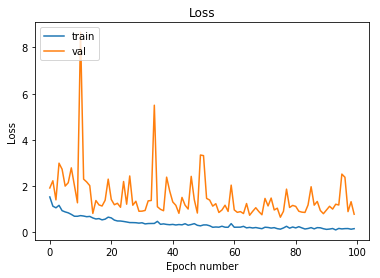

A graph displaying the accuracy over training epochs


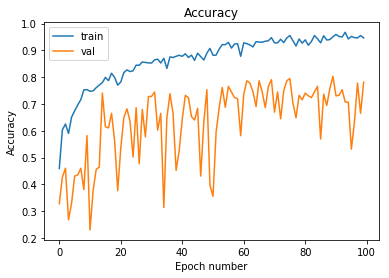

In [5]:
"""
print('train_loss:', train_loss)
print('train_acc:', train_acc)
print('val_loss:', val_loss)
print('val_acc:', val_acc)
"""
print('test_loss:', test_loss)
print('test_acc:', test_acc) 

f= open("test_results.txt","a+")
f.write("____________________________ %s _____________________________ \r\n" % model_name )
f.write("Number of epochs:%d\r\n" % number_of_epochs)
f.write("Frozen: %s\r\n" % str(frozen))
f.write("Test Accuracy:%f\r\n" % test_acc)
f.write("Test Loss:%f\r\n" % test_loss)
f.close()

print('A graph displaying the loss over training epochs')
plt.plot(train_loss)
plt.plot(val_loss)
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch number')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.savefig('graphs/train_loss_' + model_name + '_' + str(number_of_epochs) + 'epochs_' + 'Frozen_' + str(frozen) + '.png')

print('A graph displaying the accuracy over training epochs')
plt.plot(train_acc)
plt.plot(val_acc)
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch number')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('graphs/train_acc_' + model_name + '_' + str(number_of_epochs) + 'epochs_' + 'Frozen_' + str(frozen) + '.png')
plt.show()

In [6]:
# Get all predictions for test data
predictions = model.predict_generator(test_generator, steps=test_generator.n)
predictions.shape

(431, 6)